In [1]:
import numpy as np
import math
import torch
import ternary
from scipy.special import logit
from scipy.special import expit as logistic
from scipy.stats import multivariate_normal
from matplotlib.animation import FuncAnimation
from matplotlib import animation

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
mvn = multivariate_normal(np.zeros(3), np.ones(3))

### Plotting logit normal on simplex

In [3]:
def logit_normal_pdf(p):
    # Transform into multivariate gaussian
    p = np.array(p)
    x = logistic(p)
    return mvn.pdf(x)

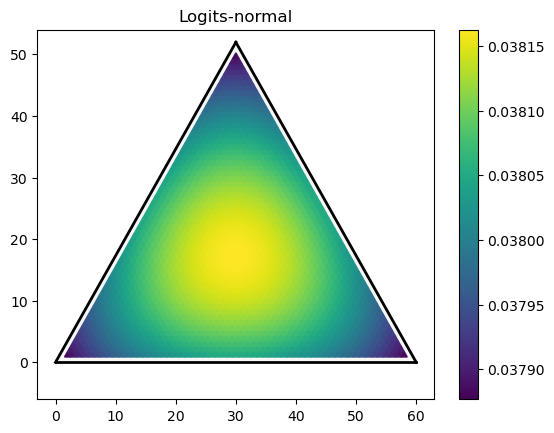

In [4]:
scale = 60
figure, tax = ternary.figure(scale=scale)
tax.heatmapf(logit_normal_pdf, boundary=False, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title("Logits-normal")

tax.show()

### Function for calculating logit normal from MVN

In [5]:
def plot_simplex(mu, var):
    mvn = multivariate_normal(mu, var)
    def logit_normal_pdf(p):
        # Transform into multivariate gaussian
        p = np.array(p)
        x = logistic(p)
        return mvn.pdf(x)
    scale = 60
    figure, tax = ternary.figure(scale=scale)
    tax.heatmapf(logit_normal_pdf, boundary=False, style="triangular")
    tax.boundary(linewidth=2.0)
    tax.set_title("Logits-normal")
    tax.show()

In [6]:
min_b = 0.1
max_b = 20.0
def b(t):
    return t*min_b + (1/2)*(t**2)*(max_b-min_b)

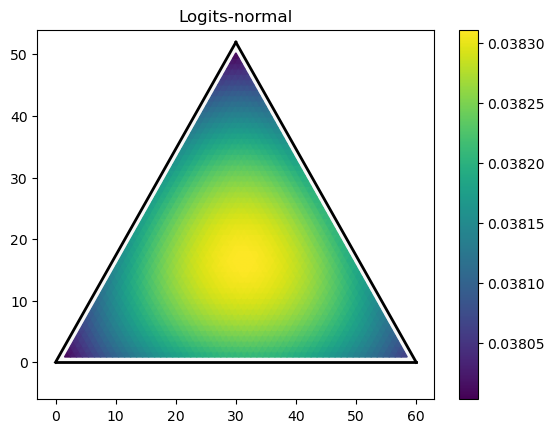

In [11]:
t = 1.0
x_0 = np.eye(3)[0]
mu = np.exp(-1/2*b(t)) * x_0
var = 1 - np.exp(-b(t))
plot_simplex(mu, var)

### gif of simplex diffusion

In [2]:
min_b = 0.1
max_b = 10.0
def b(t):
    return max_b + 0.5*(min_b - max_b)*(1 + np.cos(t*np.pi))
    # return t*min_b + (1/2)*(t**2)*(max_b-min_b)

scale = 30
fig, tax = ternary.figure(scale=scale)
num_t = 100
ts = np.linspace(1e-3, 1.0, num_t)

def plot_simplex(i):
    t = ts[i]
    x_0 = np.eye(3)[0]
    mu = np.exp(-1/2*b(t)) * x_0
    var = 1 - np.exp(-b(t))
    mvn = multivariate_normal(mu, var)
    def logit_normal_pdf(p):
        # Transform into multivariate gaussian
        p = np.array(p)
        x = logistic(p)
        return mvn.pdf(x)
    tax.heatmapf(
        logit_normal_pdf,
        boundary=True,
        style="triangular",
        colorbar=False)
    tax.boundary(linewidth=2.0)
    tax.set_title(f'Simplex diffusion t={t:.4f}')

def update(frame):
    tax.close()
    _ =  plot_simplex(frame)

plot_simplex(0)

anim = FuncAnimation(
    fig,
    update,
    frames=list(range(1, num_t)),
    interval=10,
    blit=False)
writergif = animation.PillowWriter(fps=30)
save_path = f'simplex_diffusion_cosine_minb_{min_b}_maxb_{max_b}.gif'
anim.save(save_path, writer=writergif)